<a href="https://colab.research.google.com/github/hritic/Machine-learning/blob/main/fmnist_191CS150_LAB_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visual Information Processing Lab**

# LeNet

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [ ]:
'''import os
os.chdir('/content/drive/MyDrive/MLlab pics/')
print(os.getcwd())'''

"import os\nos.chdir('/content/drive/MyDrive/MLlab pics/')\nprint(os.getcwd())"

In [ ]:
'''from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/MLlab pics/6.png"))'''

'from IPython.display import Image, display\ndisplay(Image(filename="/content/drive/MyDrive/MLlab pics/6.png"))'

### Datasets and Pre Processing

In [ ]:
import keras
from keras.datasets import fashion_mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


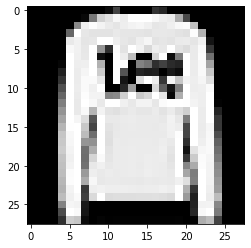

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[1], cmap='gray')

In [ ]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [ ]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [ ]:
import numpy as np
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
72.94042
90.02121
2.0224075 2.0224075
-0.8102582 -0.8102582


In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
print(xtrain.shape)
xtest =  xtest.reshape(xtest.shape[0],28,28,1)
print(xtest.shape)




(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
ytrain =  to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### LeNet Model

In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()



# 2 convolution layers
# 2 avg pooling
# flatten
# 3 dense layers(last layer use softmax)


#model.add(layers.Conv2D(20, (10,10), input_shape=(100,100,3), activation='relu', strides=(2,2), padding='same'))
#pooling window size is 2 × 2.

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 32)          4832      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

### Visualization of randomly initialized filters

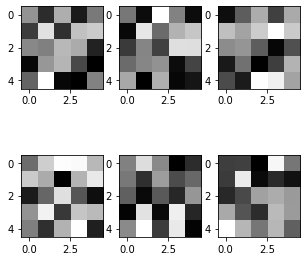

In [ ]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[ 0.03 -0.11  0.07 -0.13 -0.  ]
 [-0.09  0.14 -0.1   0.09  0.11]
 [ 0.02  0.    0.08  0.06 -0.12]
 [-0.16  0.04  0.08 -0.07 -0.17]
 [-0.03  0.18 -0.16 -0.17  0.01]]

[[-0.02 -0.16  0.17 -0.   -0.16]
 [-0.17  0.14 -0.03  0.07  0.09]
 [-0.1   0.   -0.09  0.13  0.13]
 [-0.03  0.01  0.02 -0.16 -0.09]
 [ 0.05 -0.18  0.06 -0.17 -0.15]]

[[-0.15 -0.04  0.06 -0.08  0.06]
 [ 0.09  0.05  0.1   0.17  0.1 ]
 [ 0.02  0.03 -0.04 -0.16 -0.06]
 [-0.13 -0.02 -0.17 -0.08  0.07]
 [-0.07 -0.13  0.17  0.15  0.05]]

[[-0.02  0.11  0.17  0.16  0.08]
 [ 0.1   0.06 -0.17  0.07  0.14]
 [-0.13 -0.03  0.13 -0.05 -0.15]
 [ 0.03  0.15 -0.09  0.09  0.08]
 [ 0.   -0.11  0.07  0.17 -0.13]]

[[ 0.02  0.14  0.03 -0.15 -0.09]
 [ 0.01 -0.09  0.05 -0.05 -0.02]
 [-0.03 -0.14 -0.04 -0.1   0.04]
 [-0.15  0.14 -0.14  0.16 -0.1 ]
 [ 0.03  0.18 -0.07  0.15 -0.15]]

[[-0.06 -0.06 -0.14  0.16  0.01]
 [-0.07  0.15 -0.13 -0.09 -0.12]
 [-0.09 -0.05  0.06  0.07  0.05]
 [ 0.07 -0.04 -0.08  0.09  0.05]
 [ 0.17  0.08  0.01  0.08 -0.02]]

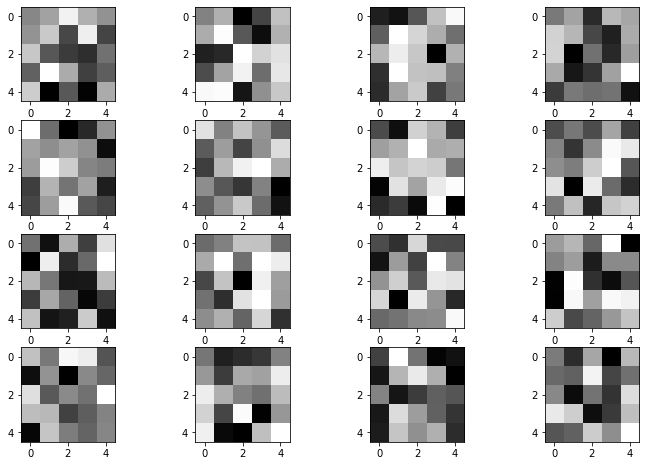

In [ ]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.01  0.02  0.07  0.03  0.01]
 [ 0.01  0.05 -0.03  0.07 -0.04]
 [ 0.04 -0.02 -0.04 -0.05 -0.01]
 [-0.02  0.08  0.03 -0.04 -0.02]
 [ 0.05 -0.08 -0.02 -0.08  0.03]]

[[-0.    0.02 -0.08 -0.04  0.04]
 [ 0.02  0.07 -0.03 -0.07  0.03]
 [-0.06 -0.05  0.07  0.05  0.05]
 [-0.03  0.02  0.06 -0.01  0.06]
 [ 0.07  0.07 -0.07  0.01  0.04]]

[[-0.05 -0.06 -0.02  0.04  0.07]
 [-0.02  0.07  0.05  0.02 -0.01]
 [ 0.03  0.06  0.04 -0.07  0.03]
 [-0.05  0.07  0.04  0.03 -0.  ]
 [-0.05  0.02  0.04 -0.03 -0.01]]

[[-0.    0.02 -0.05  0.03  0.02]
 [ 0.05  0.03 -0.03 -0.06  0.03]
 [ 0.05 -0.08 -0.01 -0.05  0.02]
 [ 0.03 -0.06 -0.04  0.02  0.08]
 [-0.04 -0.   -0.01 -0.01 -0.06]]

[[ 0.07 -0.02 -0.08 -0.05  0.01]
 [ 0.01  0.    0.01  0.   -0.07]
 [ 0.01  0.07  0.04 -0.   -0.01]
 [-0.04  0.02 -0.01  0.01 -0.06]
 [-0.04  0.01  0.06 -0.03 -0.04]]

[[ 0.06  0.01  0.04  0.02 -0.02]
 [-0.02  0.02 -0.03  0.01  0.06]
 [-0.03  0.04  0.07  0.08  0.03]
 [ 0.01 -0.02 -0.04  0.01 -0.07]
 [-0.01  0.02  0.05 -0.01 -0.06]]

### Compile and Training the model

In [ ]:
#os.chdir('/content/drive/MyDrive/MLlab pics/Weights/')

#print(os.getcwd())

from keras.callbacks import ModelCheckpoint,CSVLogger
mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=50, verbose=1)

Epoch 1/50
188/188 [==============================] - ETA: 0s - loss: 1.5215 - accuracy: 0.4957
Epoch 1: val_loss improved from inf to 0.90213, saving model to CNN_MNIST.h5
188/188 [==============================] - 3s 12ms/step - loss: 1.5215 - accuracy: 0.4957 - val_loss: 0.9021 - val_accuracy: 0.6590
Epoch 2/50
182/188 [============================>.] - ETA: 0s - loss: 0.8233 - accuracy: 0.6921
Epoch 2: val_loss improved from 0.90213 to 0.73114, saving model to CNN_MNIST.h5
188/188 [==============================] - 2s 10ms/step - loss: 0.8199 - accuracy: 0.6935 - val_loss: 0.7311 - val_accuracy: 0.7138
Epoch 3/50
184/188 [============================>.] - ETA: 0s - loss: 0.7034 - accuracy: 0.7372
Epoch 3: val_loss improved from 0.73114 to 0.66976, saving model to CNN_MNIST.h5
188/188 [==============================] - 2s 10ms/step - loss: 0.7025 - accuracy: 0.7375 - val_loss: 0.6698 - val_accuracy: 0.7452
Epoch 4/50
185/188 [============================>.] - ETA: 0s - loss: 0.6345 

### Evaluate

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.3401 - accuracy: 0.8792


[0.34006139636039734, 0.8791999816894531]

### Loss and Accuracy Curves

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

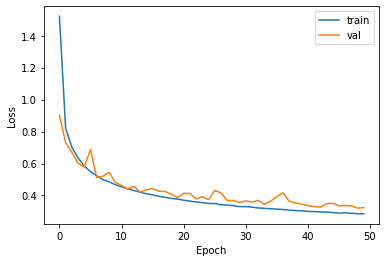

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

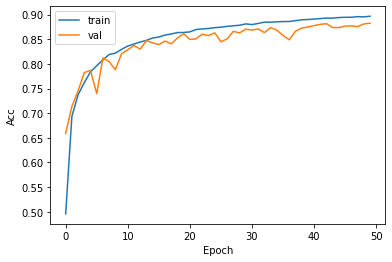

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [ ]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
5 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7


In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.82      0.82      1000
     class 1       0.97      0.98      0.97      1000
     class 2       0.84      0.78      0.81      1000
     class 3       0.89      0.87      0.88      1000
     class 4       0.78      0.82      0.80      1000
     class 5       0.97      0.96      0.96      1000
     class 6       0.67      0.69      0.68      1000
     class 7       0.91      0.97      0.94      1000
     class 8       0.96      0.96      0.96      1000
     class 9       0.98      0.93      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[821   3  14  27   6   1 119   0   9   0]
 [  2 979   1  11   3   0   1   0   3   0]
 [ 13   4 784  11 104   0  81   0   3   0]
 [ 19  18  10 874  41   0  36   0   2   0]
 [  1   1  63  26 821   0  87   0   1   0]
 [  0   0   0   1   0 957   0  32   1   9]
 [134   5  54  24  77   0 692   0  14   0]
 [  0   0   0   0   0  17   0 971   1  11]
 [  6   2   4   5   3   3  12   5 960   0]
 [  0   0   0   0   0  10   0  56   1 933]]


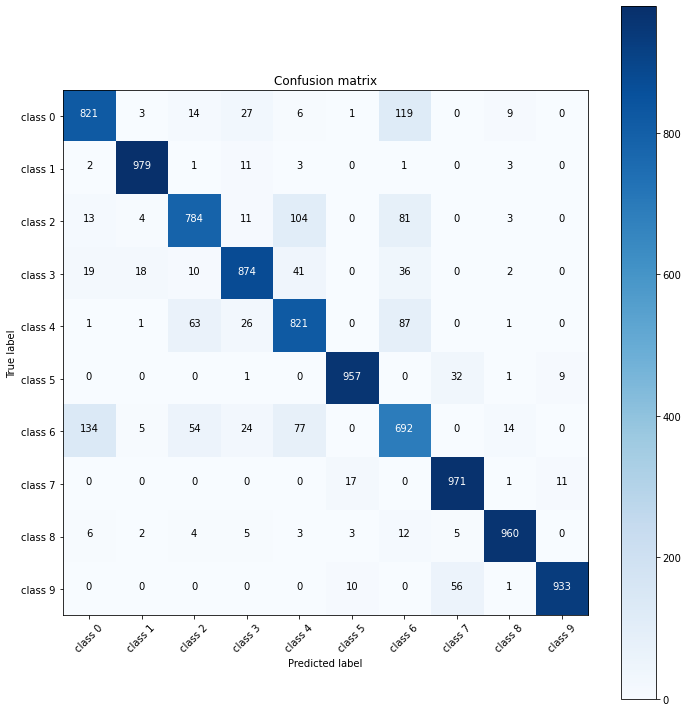

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [ ]:
for layer in model.layers:
  print(layer)

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))

In [ ]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

(1, 24, 24, 6)
(1, 12, 12, 6)
(1, 8, 8, 32)
(1, 4, 4, 32)
(1, 512)
(1, 120)
(1, 84)
(1, 10)


(1, 24, 24, 6)


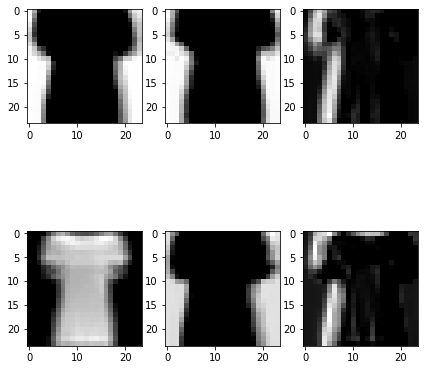

In [ ]:
print(activations[0].shape)
display_activation(activations,3,2,0)

(1, 12, 12, 6)


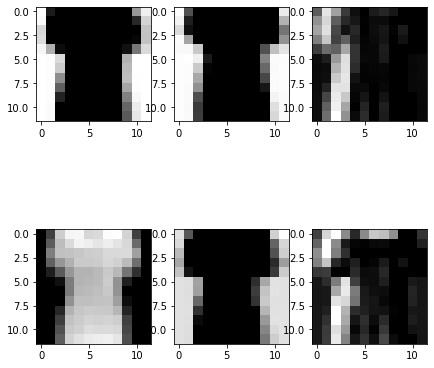

In [ ]:
print(activations[1].shape)
display_activation(activations,3,2,1)

(1, 8, 8, 32)


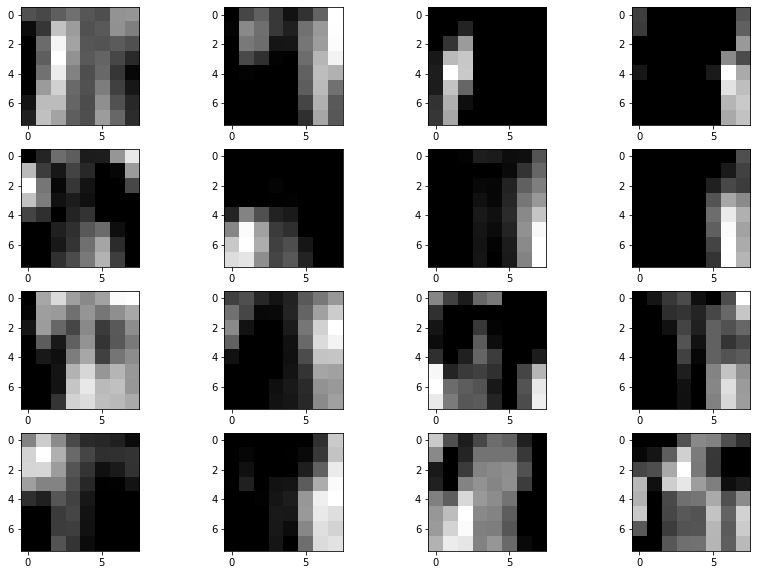

In [ ]:
print(activations[2].shape)
display_activation(activations,4,4,2)

(1, 4, 4, 32)


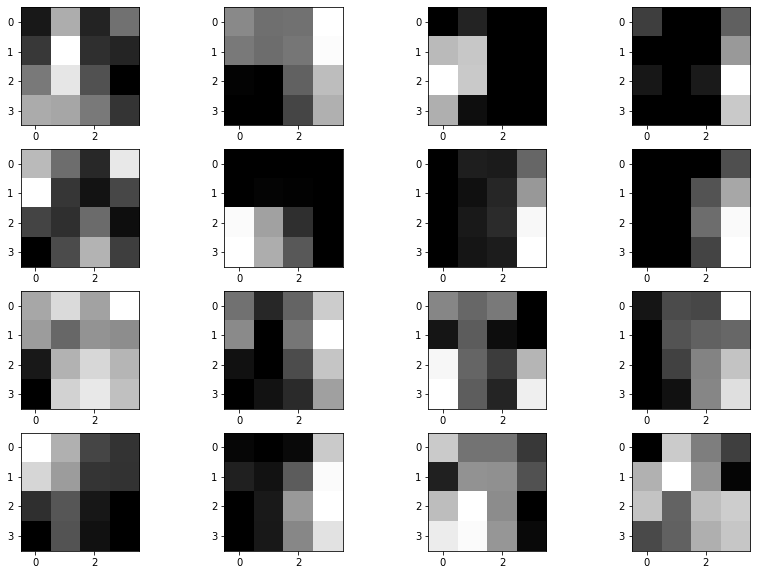

In [ ]:
print(activations[3].shape)
display_activation(activations,4,4,3)

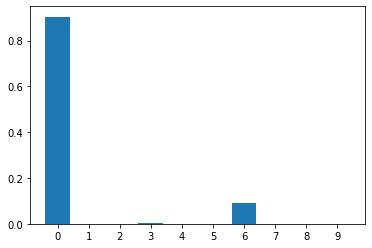

In [ ]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

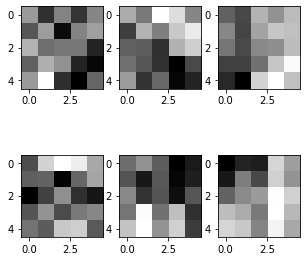

In [ ]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-0.05 -0.24 -0.09 -0.23 -0.08]
 [-0.17 -0.04 -0.31 -0.09 -0.04]
 [-0.   -0.13 -0.11 -0.11 -0.26]
 [-0.15 -0.01 -0.06 -0.26 -0.31]
 [-0.05  0.14 -0.24 -0.33 -0.14]]

[[-0.07 -0.18  0.12  0.04 -0.15]
 [-0.31 -0.05 -0.16 -0.    0.07]
 [-0.23 -0.24 -0.34 -0.05  0.01]
 [-0.2  -0.26 -0.33 -0.45 -0.28]
 [-0.1  -0.33 -0.21 -0.43 -0.36]]

[[-0.16 -0.25  0.14  0.02  0.17]
 [-0.02 -0.27  0.08  0.21  0.19]
 [-0.08 -0.24 -0.01  0.    0.18]
 [-0.28 -0.28 -0.1   0.21  0.4 ]
 [-0.37 -0.52  0.26  0.42  0.19]]

[[ 0.07  0.42  0.53  0.49  0.31]
 [ 0.12  0.13 -0.12  0.14  0.3 ]
 [-0.12  0.04  0.24 -0.   -0.07]
 [ 0.09  0.25  0.07  0.19  0.22]
 [ 0.17  0.11  0.39  0.4   0.11]]

[[-0.1  -0.02 -0.14 -0.34 -0.28]
 [-0.16 -0.29 -0.15 -0.33 -0.27]
 [-0.04 -0.23 -0.16 -0.31 -0.15]
 [-0.08  0.21 -0.09  0.08 -0.24]
 [ 0.09  0.22 -0.01  0.12 -0.21]]

[[-0.52 -0.4  -0.42  0.21  0.02]
 [-0.44 -0.09 -0.27  0.19 -0.02]
 [-0.18 -0.04  0.01  0.35  0.2 ]
 [ 0.13  0.07 -0.1   0.36  0.11]
 [ 0.21  0.17 -0.07  0.32  0.06]]

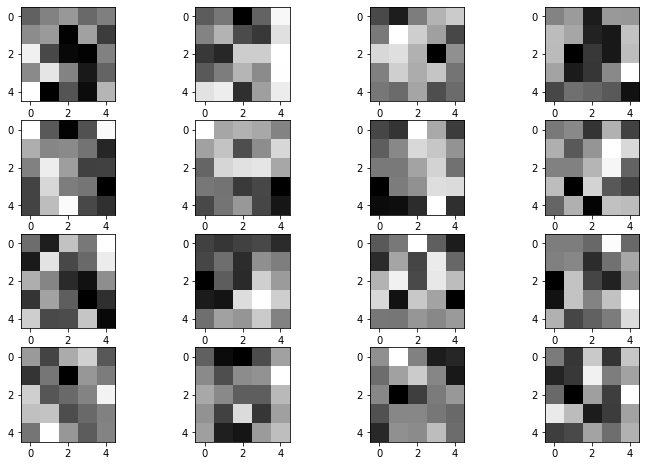

In [ ]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[-0.    0.02  0.03  0.    0.02]
 [ 0.02  0.03 -0.07  0.04 -0.03]
 [ 0.09 -0.02 -0.06 -0.07  0.02]
 [ 0.02  0.08  0.02 -0.05 -0.  ]
 [ 0.1  -0.07 -0.01 -0.06  0.05]]

[[-0.03 -0.   -0.1  -0.02  0.1 ]
 [ 0.01  0.05 -0.04 -0.05  0.08]
 [-0.05 -0.07  0.07  0.07  0.11]
 [-0.03  0.    0.05  0.01  0.1 ]
 [ 0.08  0.09 -0.06  0.03  0.09]]

[[-0.04 -0.07 -0.01  0.03  0.04]
 [-0.01  0.08  0.05  0.02 -0.04]
 [ 0.05  0.06  0.03 -0.09  0.01]
 [-0.    0.05  0.02  0.04 -0.01]
 [-0.01 -0.02  0.02 -0.04 -0.02]]

[[ 0.02  0.03 -0.06  0.03  0.03]
 [ 0.05  0.04 -0.05 -0.06  0.06]
 [ 0.05 -0.07 -0.04 -0.06  0.06]
 [ 0.04 -0.06 -0.04  0.02  0.1 ]
 [-0.03  0.   -0.   -0.01 -0.06]]

[[ 0.09 -0.02 -0.08 -0.03  0.09]
 [ 0.04  0.01  0.01 -0.   -0.06]
 [ 0.01  0.08  0.03 -0.04 -0.04]
 [-0.04  0.06  0.   -0.   -0.08]
 [-0.04  0.05  0.09 -0.03 -0.05]]

[[ 0.09  0.03  0.04  0.03  0.01]
 [ 0.03  0.05 -0.03  0.01  0.06]
 [-0.01  0.06  0.07  0.07  0.03]
 [-0.   -0.   -0.04 -0.03 -0.08]
 [-0.03 -0.    0.02 -0.03 -0.07]]